### First of all we will import libraries

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [245]:
df=pd.read_excel("E:/data science 6th s//datasets//Heart_Data.xlsx")
df.head()

,serialNo,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,1,urban,64,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.0,75,no,yes
1,2,rural,61,none,greater than 3,job/business,middle,no smoker,married,>3,ghee,none,5.2,75,no,no
2,3,rural,75,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.3,75,no,no
3,4,urban,70,none,less than 3,other wages,middle,no smoker,single,<3,ghee,two time,5.5,70,no,no
4,5,rural,53,none,greater than 3,other wages,middle,no smoker,married,>3,ghee,ex fast food,5.0,50,no,yes


### First of all we will perfrom preprocessing of data

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   serialNo        200 non-null    int64  
 1   area            200 non-null    object 
 2   age             200 non-null    int64  
 3   exercise        200 non-null    object 
 4   fast_food_new   200 non-null    object 
 5   occupation      200 non-null    object 
 6   incom_catg      200 non-null    object 
 7   smoking         200 non-null    object 
 8   marital_status  200 non-null    object 
 9   meat_intake     200 non-null    object 
 10  cooking_oil     200 non-null    object 
 11  fast_food       200 non-null    object 
 12  height          200 non-null    float64
 13  weight          200 non-null    int64  
 14  bypass          200 non-null    object 
 15  heart_attack    200 non-null    object 
dtypes: float64(1), int64(3), object(12)
memory usage: 25.1+ KB


In [247]:
df.isna().sum()

serialNo          0
area              0
age               0
exercise          0
fast_food_new     0
occupation        0
incom_catg        0
smoking           0
marital_status    0
meat_intake       0
cooking_oil       0
fast_food         0
height            0
weight            0
bypass            0
heart_attack      0
dtype: int64

### so we can see that data have no missing value we can further proceed with our data set

In [248]:
df.shape

(200, 16)

### i will check the levels or unique value of some column after the checking we will covert them numeric with label encoder technique

In [249]:
df['area'].unique()



array(['urban', 'rural'], dtype=object)

In [250]:
df['meat_intake'].unique()

array(['>3', '<3'], dtype=object)

In [251]:
df['occupation'].unique()

array(['job/business', 'other wages', 'none'], dtype=object)

In [252]:
df['smoking'].unique()

array(['no smoker', 'smoker'], dtype=object)

In [253]:
df['heart_attack'].value_counts()

no     154
yes     46
Name: heart_attack, dtype: int64

([<matplotlib.patches.Wedge at 0x1afc66b7090>,
 [Text(0.16448881261594633, -1.0876320290080632, '154'),
  Text(-0.16448876170021667, 1.087632036708339, '46')],
 [Text(0.0897211705177889, -0.593253834004398, '77.0%'),
  Text(-0.08972114274557273, 0.5932538382045485, '23.0%')])

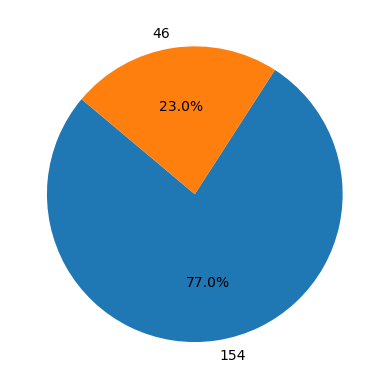

In [254]:
plt.pie(df['heart_attack'].value_counts(),autopct='%1.1f%%', startangle=140,labels=df['heart_attack'].value_counts())

# Now checking outlier in data columns

In [255]:
columns_to_plot = ['age', 'height', 'weight']

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>, <Axes: >]], dtype=object)

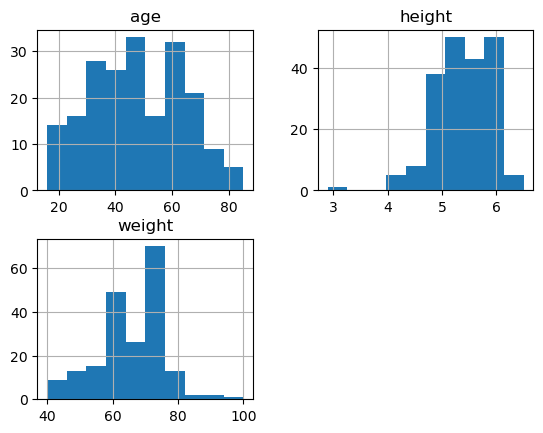

In [256]:
df.hist(columns_to_plot)

### with the help of this histogrm we Now we can see that no otlier in our data soo we can move further 

#### column 1 seems to idendifier so we can remove this column

In [257]:
df.drop(columns=['serialNo'], inplace=True)

In [258]:
df.head()

,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,urban,64,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.0,75,no,yes
1,rural,61,none,greater than 3,job/business,middle,no smoker,married,>3,ghee,none,5.2,75,no,no
2,rural,75,none,greater than 3,job/business,middle,no smoker,single,>3,oil,ex fast food,5.3,75,no,no
3,urban,70,none,less than 3,other wages,middle,no smoker,single,<3,ghee,two time,5.5,70,no,no
4,rural,53,none,greater than 3,other wages,middle,no smoker,married,>3,ghee,ex fast food,5.0,50,no,yes


## now we have to convert charater column to numeric for model preprepation

In [259]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


## Encode categorical variables using label encoding

In [260]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [261]:
df.head()

,area,age,exercise,fast_food_new,occupation,incom_catg,smoking,marital_status,meat_intake,cooking_oil,fast_food,height,weight,bypass,heart_attack
0,1,64,1,0,0,2,0,1,1,2,0,5.0,75,0,1
1,0,61,1,0,0,2,0,0,1,1,3,5.2,75,0,0
2,0,75,1,0,0,2,0,1,1,2,0,5.3,75,0,0
3,1,70,1,1,2,2,0,1,0,1,7,5.5,70,0,0
4,0,53,1,0,2,2,0,0,1,1,0,5.0,50,0,1


## Now we have converted all the column using label encoder technique because algo will be work on numerical value

In [262]:
df2=df.drop('heart_attack',axis='columns')

In [263]:
target=df.heart_attack

target.head()

0    1
1    0
2    0
3    0
4    1
Name: heart_attack, dtype: int32

## we have separated our target column now we will train our model

In [264]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2,target,test_size=0.30)

### first we will train our model with 70% train data 

# 1-Logistic regreession model

In [265]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train,y_train)

C:\Users\Aslam Computer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [266]:
model1.score(x_test,y_test)

0.8333333333333334

## so we can see that the accuracy of model with logistic regression is good 

In [267]:
y_predicted=model1.predict(x_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [268]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[45,  5],
       [ 5,  5]], dtype=int64)

In [269]:
import matplotlib.pyplot as plt
import seaborn as sn

Text(50.722222222222214, 0.5, 'actual')

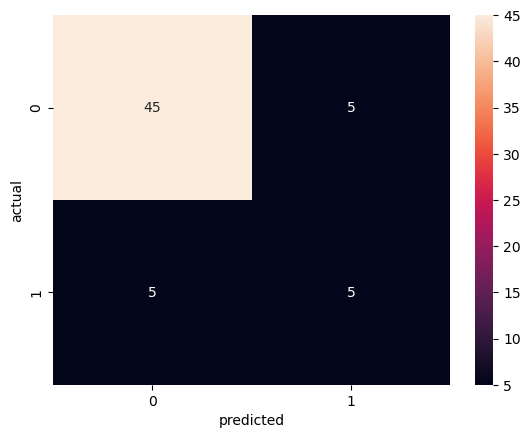

In [270]:
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

## Now we wil use 20% data for test and 80% data for training

In [271]:
xtrain,xtest,ytrain,ytest=train_test_split(df2,target,test_size=0.20)

In [272]:
lr2=LogisticRegression()
model2=lr.fit(xtrain,ytrain)

C:\Users\Aslam Computer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [273]:
model2.score(xtest,ytest)

0.825

## accuracy is not with 20% test data so will use 30% data for our model

# 2- KNN model for Data

In [274]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [275]:
model3=knn.fit(x_train,y_train)

In [276]:
model3.score(x_test,y_test)

0.8333333333333334

In [277]:
y_predicted1=model3.predict(x_test)
y_predicted1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [278]:
cm1=confusion_matrix(y_test,y_predicted1)
cm1

array([[45,  5],
       [ 5,  5]], dtype=int64)

## We can see that accuracy with knn is  good 

In [279]:
model4=knn.fit(xtrain,ytrain)

In [280]:
model4.score(xtest,ytest)

0.75

# 3- Random Forest Algorithm

In [281]:
from sklearn.ensemble import RandomForestClassifier
rn=RandomForestClassifier()
model5=rn.fit(x_train,y_train)

In [282]:
model5.score(x_test,y_test)

0.7666666666666667

In [283]:
y_predicted2=model5.predict(x_test)
y_predicted2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [284]:
cm2=confusion_matrix(y_test,y_predicted2)
cm2

array([[42,  8],
       [ 6,  4]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

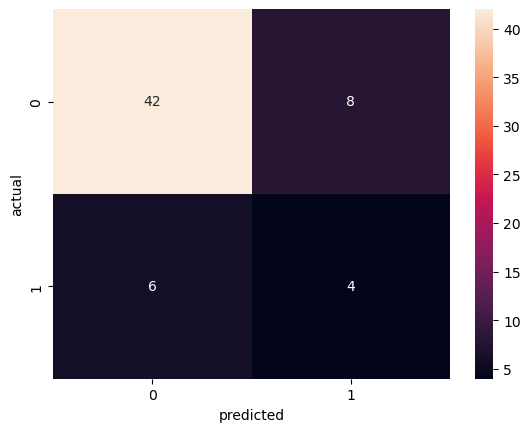

In [285]:
sn.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')


# for 80% training data set of random forest

In [286]:
model6=rn.fit(xtrain,ytrain)

In [287]:
model6.score(xtest,ytest)

0.825

# 1- Now we will Use Decision Tree for model

In [310]:
from sklearn import tree
model7=tree.DecisionTreeClassifier()

In [311]:
model7.fit(x_train,y_train)

DecisionTreeClassifier()

In [312]:
model7.score(x_test,y_test)

0.7666666666666667

In [313]:
y_predicted3=model7.predict(x_test)
y_predicted3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [314]:
cm3=confusion_matrix(y_test,y_predicted3)
cm3

array([[41,  9],
       [ 5,  5]], dtype=int64)

## accuracy is  with 30% test data so will use 20% data for our model


In [315]:

model7.score(xtest,ytest)

1.0

In [316]:
y_predicted4=model7.predict(xtest)
y_predicted4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [317]:
cm4=confusion_matrix(ytest,y_predicted4)
cm4

array([[32,  0],
       [ 0,  8]], dtype=int64)

# accuracy with 20% test set is more just becouse of overfitting 

# 5- Naive Bayes algorithm

In [318]:
from sklearn.naive_bayes import GaussianNB
model8=GaussianNB()

In [319]:
model8.fit(x_train,y_train)

GaussianNB()

In [320]:
model8.score(x_test,y_test)

0.8666666666666667

### In above we use GaussianNB to predict the result

### now we will use 20% test data to predict

In [321]:
model8.fit(xtrain,ytrain)

GaussianNB()

In [322]:
model8.score(xtest,ytest)

0.8

# Cross validation

#  3 fold for model1 logistic regression

In [329]:
import warnings
warnings.filterwarnings("ignore")

In [330]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=3)
result2=cross_val_score(model1, df2, target, cv=kfold)


result2

array([0.56716418, 0.86567164, 0.96969697])

In [331]:
result2.mean()

0.8008442635308306

# for 5 fold

In [332]:
kfold = KFold(n_splits=5)
result3=cross_val_score(model1, df2, target, cv=kfold)


result3

array([0.6  , 0.65 , 0.9  , 1.   , 0.925])

In [333]:

result3.mean()

0.8150000000000001

In [334]:
kfold = KFold(n_splits=10)
result4=cross_val_score(model1, df2, target, cv=kfold)
result4

array([0.65, 0.55, 0.55, 0.65, 0.9 , 0.95, 1.  , 1.  , 0.9 , 0.95])

In [335]:
result4.mean()

0.8099999999999999